## Aim of the Project:
Predict the sales of products across various Big Mart outlets using historical data. This helps the company understand sales drivers and optimize inventory and marketing.

###  1. Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

###  2. Data Collection and Processing

In [2]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv(r'E:\Akanksha_project\big mart sales analysis\Train.csv')

In [3]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [5]:
# getting some information about thye dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

Item_Identifier  

Item_Fat_Content  

Item_Type  

Outlet_Identifier  

Outlet_Size  

Outlet_Location_Type  

Outlet_Type 

In [6]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 3. Handling Missing Values

In [7]:
# Mean --> average --> converting the numerical value with mean
# Mode --> more repeated value --> converting the categorical data with mode

In [8]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [9]:
# filling the missing values in "Outlet_Size" column with Mode
# outlet_size and outlet_type are cp-related column so we have to consider the both
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', 
                                                columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [10]:
#checking null value in outlet_size column which return true or false 
miss_values = big_mart_data['Outlet_Size'].isnull()   
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [11]:
#applying mode value to outlet_Size column 
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [12]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 4. Data Analysis

In [13]:
#statistical measure about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### 4.1 Numerical Features

In [14]:
# Make all plots automatically look beautiful and modern.
sns.set()

In [15]:
#for ignoring the warning
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

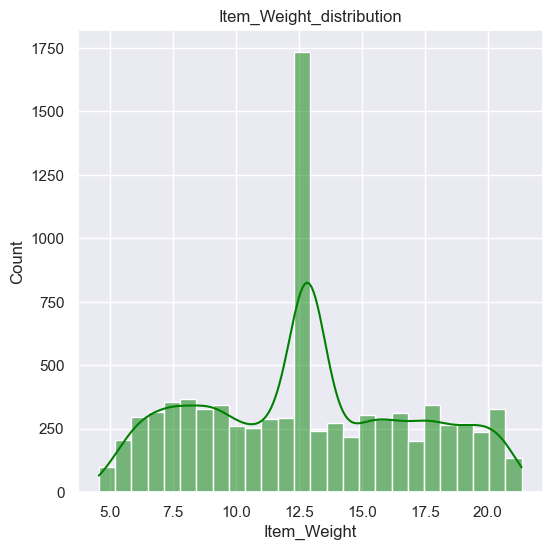

In [16]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Weight'], color='green', kde=True)
plt.title("Item_Weight_distribution")
plt.show()

Key Insights:

The distribution of item weights shows a prominent concentration around 12.5 units.

This suggests that many products share a standardized weight, likely due to common packaging or size categories.

A secondary cluster is noticeable between 6 and 8 units, indicating the presence of lighter product ranges.

The overall shape of the distribution is mostly symmetric, with a slight right skew, meaning there are a few heavier items but they are less common.

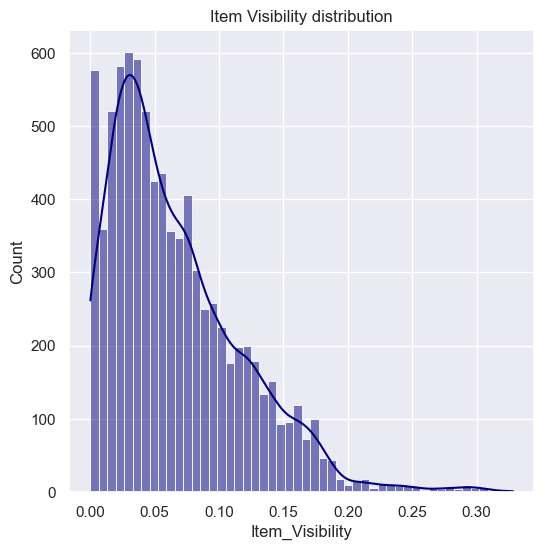

In [17]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Visibility'], color='navy', kde=True)
plt.title("Item Visibility distribution")
plt.show()

Key Insights:

The distribution of item visibility is highly right-skewed (positively skewed).

Most items have very low visibility values, typically below 0.05.

Very few items have higher visibility above 0.10, and extremely few go beyond 0.20.

The distribution suggests that a large number of items are not prominently visible in stores.

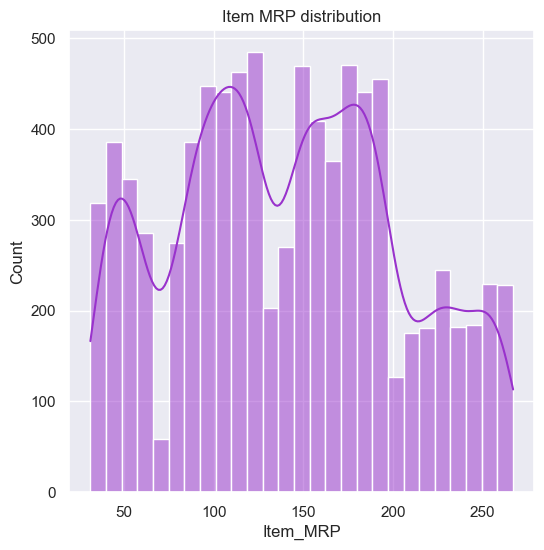

In [18]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_MRP'], color='darkorchid', kde=True)
plt.title("Item MRP distribution")
plt.show()

Key Insights:

The distribution of item MRP is multi-modal, meaning it has multiple peaks.

There are clusters of products priced around 50, 100, 150, and 200 units.

This suggests that products tend to fall into certain pricing tiers rather than being uniformly spread across prices.

Higher-priced items (above 200) are less common but still present.

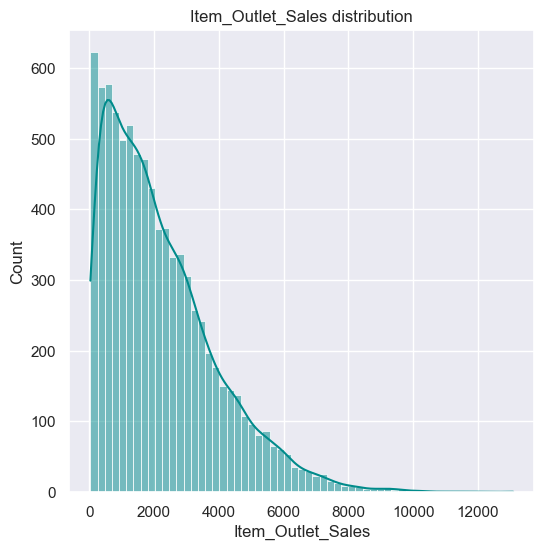

In [19]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(big_mart_data['Item_Outlet_Sales'], color='darkcyan', kde=True)
plt.title("Item_Outlet_Sales distribution")
plt.show()

Key Insights:

The distribution of Item_Outlet_Sales is right-skewed — meaning most items have low to moderate sales, while a few items have very high sales.

A large number of products are concentrated at lower sales values, especially under 2000 units.

A small number of outliers exist with very high sales figures.



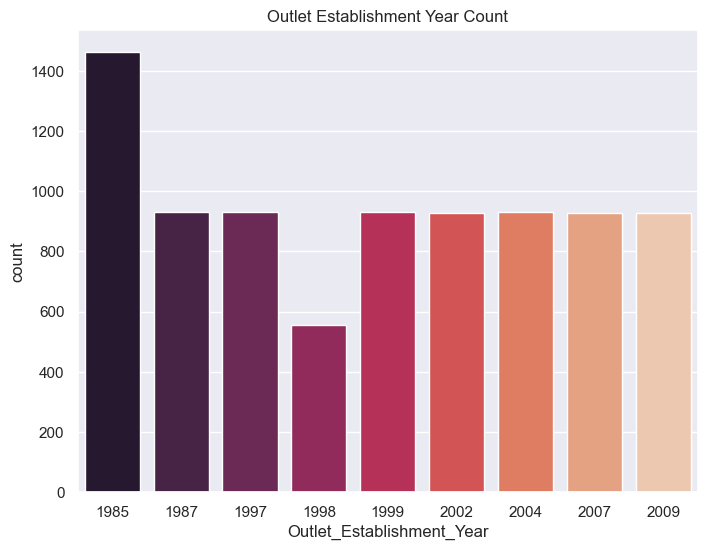

In [20]:
# Outlet_Establishment_Year column
plt.figure(figsize=(8, 6))  # slightly bigger for better x-axis visibility
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data, palette='rocket')
plt.title('Outlet Establishment Year Count')
plt.show()

Key Insights:

Most outlets were established in 1985, suggesting a major expansion phase during that year.

Few outlets were established between 1997–2009, indicating a slowdown or selective expansion in later years.

The newest outlets appeared in 1999 and 2009, which could represent newer retail formats or modernized stores.

##### 4.2 Categorical Features

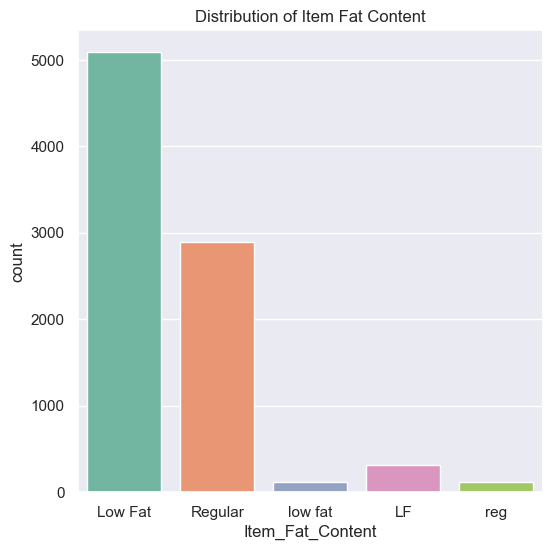

In [21]:
# Item_Fat_Content column
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data, palette='Set2')  
plt.title('Distribution of Item Fat Content')
plt.show()

Key Insights:

The majority of items fall under "Low Fat" and "Regular" categories.

Some minor variations like "low fat", "LF", and "reg" appear, indicating inconsistent labeling in the dataset.

Data cleaning is needed to standardize these categories for accurate analysis (e.g., mapping "low fat" and "LF" to "Low Fat", and "reg" to "Regular").

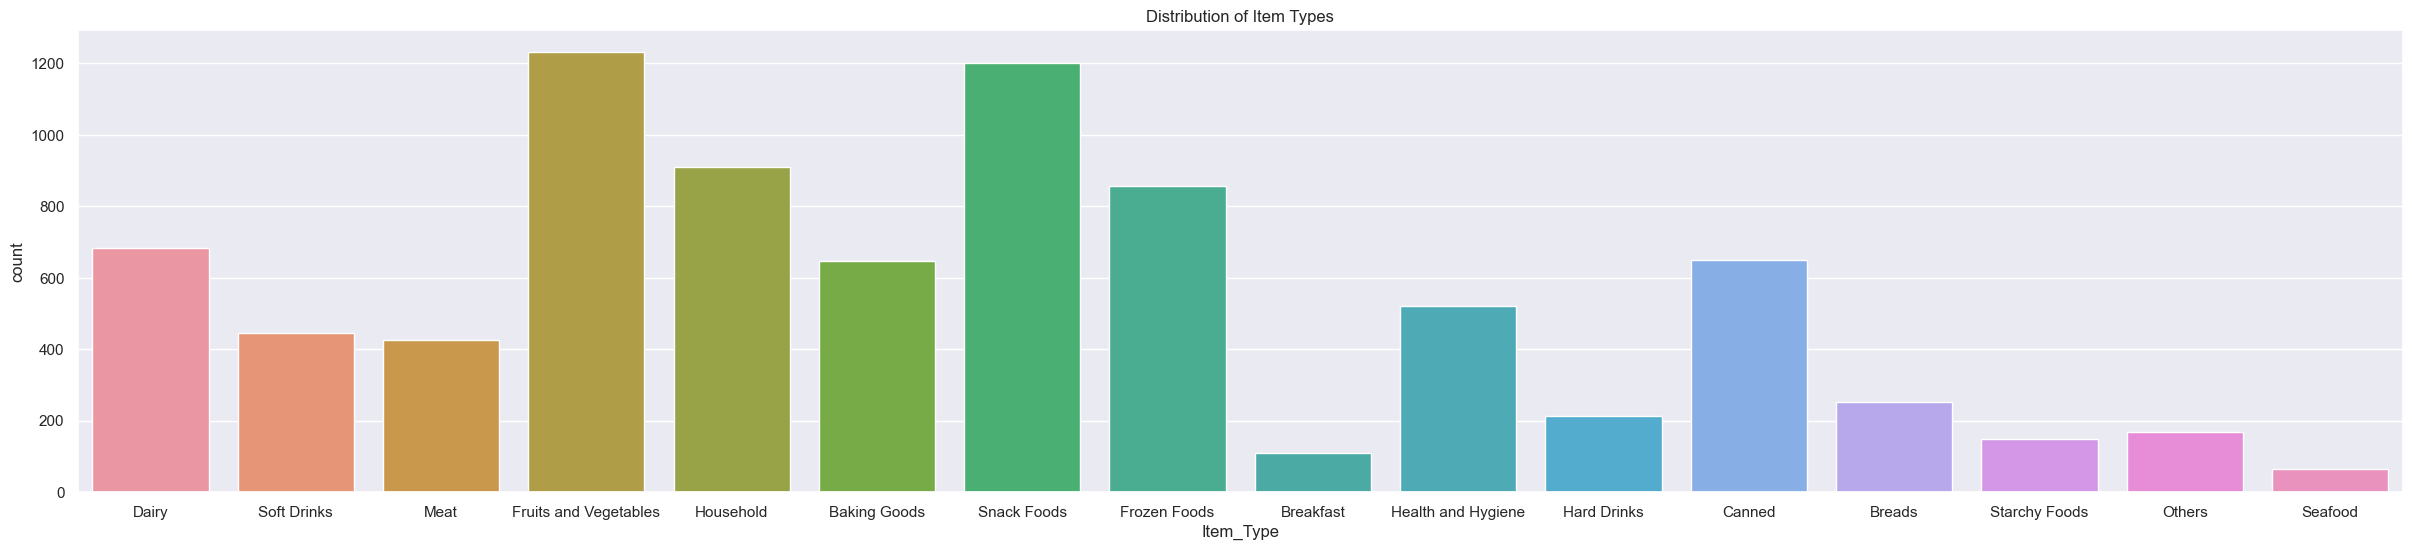

In [22]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.title('Distribution of Item Types')
plt.show()

Key Insight:

Some categories are significantly more frequent, such as Fruits and Vegetables, Snack Foods, and Household products.

A few categories are relatively rare.

This imbalance can influence modeling if not handled properly.

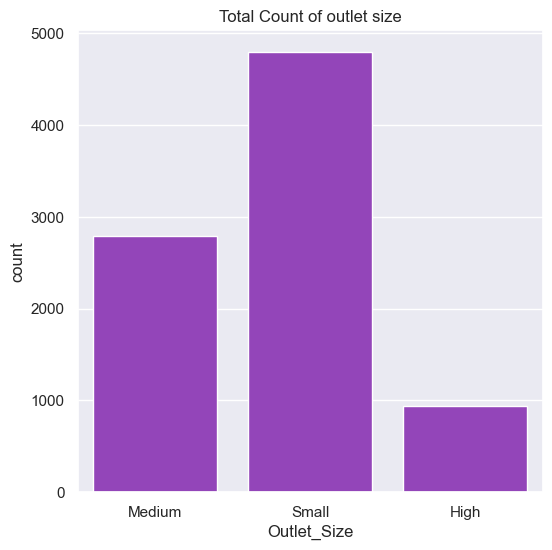

In [23]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data, color='darkorchid')
plt.title('Total Count of outlet size')
plt.show()

Key Insight:

Small outlets dominate the data, followed by Medium, and High being the least common.

This suggests that most sales data is generated from small-sized outlets.

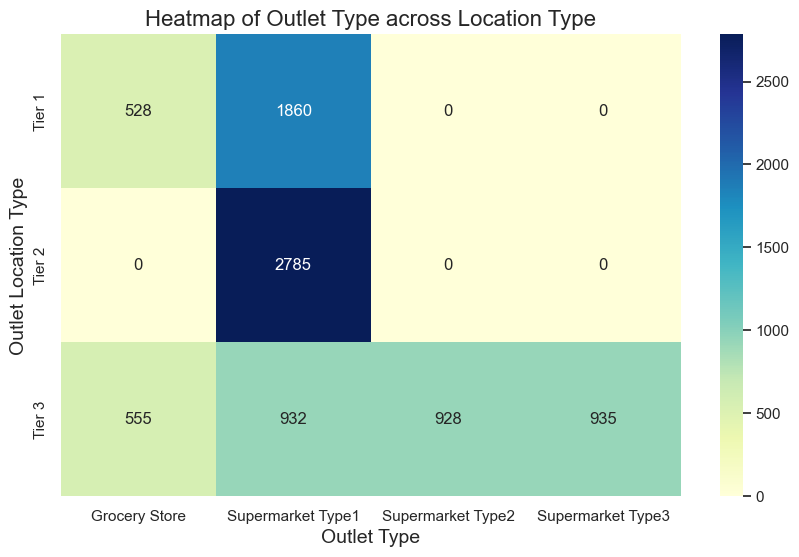

In [24]:
# Creating a crosstab for heatmap
outlet_crosstab = pd.crosstab(big_mart_data['Outlet_Location_Type'], big_mart_data['Outlet_Type'])

# Plotting the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(outlet_crosstab, annot=True, fmt='d', cmap='YlGnBu')  # 'annot=True' shows numbers inside boxes
plt.title('Heatmap of Outlet Type across Location Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=14)
plt.ylabel('Outlet Location Type', fontsize=14)
plt.show()


Key Insight:

Supermarkets are more concentrated in higher-tier locations, while Grocery Stores tend to be spread more across lower-tier locations.

Tier 1 and Tier 2 cities (more urban areas) have a higher number of Supermarket Type1 and Type3 outlets.

Grocery stores and Supermarket Type2 are more evenly distributed across all location types, including Tier 3 (less urban/rural).

Supermarket Type1 seems to dominate overall, but particularly in urban areas.

### 5. Data Pre-Processing

In [25]:
# checking the first 5 rows of data
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
# checking the different value_count of data
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [27]:
# Replacing inconsistent labels in the 'Item_Fat_Content' column
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

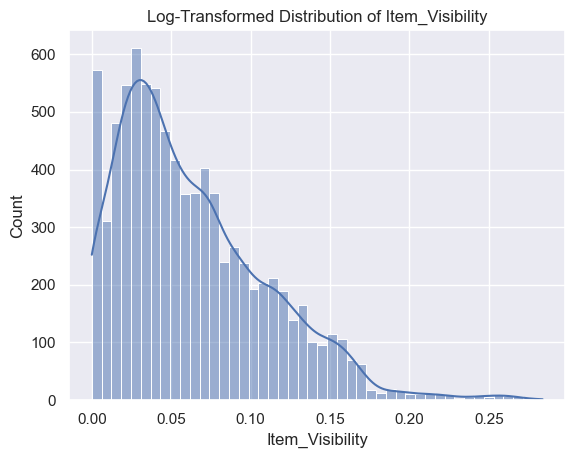

In [28]:
# Apply log(1 + x) to handle outlire
big_mart_data['Item_Visibility'] = np.log1p(big_mart_data['Item_Visibility'])

# Plotting transformed distribution
sns.histplot(big_mart_data['Item_Visibility'], kde=True)
plt.title("Log-Transformed Distribution of Item_Visibility")
plt.show()

### 5.1 Label Encoding

In [29]:
#Import LabelEncoder from sklearn
encoder = LabelEncoder()

# Converting categorical string labels to numeric values

big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [30]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.015920,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019095,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016621,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### 5.2 Splitting features and Target

In [31]:
# Separating the independent variables (features) from the target variable
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)

# Target variable: the value we want to predict (sales of a product in a specific outlet)
Y = big_mart_data['Item_Outlet_Sales']

In [32]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.015920   
1                   8        5.920                 1         0.019095   
2                 662       17.500                 0         0.016621   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.055230   
8519              897        8.380                 1         0.045912   
8520             1357       10.600                 0         0.034581   
8521              681        7.210                 1         0.135597   
8522               50       14.800                 0         0.043900   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [33]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


### 5.3 Splitting the data into Training data & Testing Data

In [34]:
# Splitting the dataset into training and testing sets
# 80% of the data will be used for training, 20% for testing
# random_state=2 ensures reproducibility (you'll get the same split every time you run it)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


### 6 Machine Learning Model Training

##### XGBoost Regressor

In [ ]:
# Initialize the XGBoost Regressor model
regressor = XGBRegressor()

# Fit the model to the training data
regressor.fit(X_train, Y_train)

### 6.1 Evaluation

In [36]:
# prediction on training data it will give t_train prediction against x_train
training_data_prediction = regressor.predict(X_train)
print(training_data_prediction)

[2241.8008 2784.4749 3348.1802 ... 2619.9922 1810.6472 2076.5325]


In [37]:
# R squared Value (used for checking the performance of the model range btw 0 to 1)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.8762174618111388


In [38]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[2350.1606 1861.6439 1700.9556 ... 2857.3364 2405.3838 3876.3467]


In [39]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.5017253991620692


In [40]:
cv_scores = cross_val_score(regressor, X, Y, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Average R² score: {cv_scores.mean()}")

Cross-validated R² scores: [0.52485506 0.4933265  0.47775672 0.49501617 0.50570057]
Average R² score: 0.4993310037995875


The XGBoost model has high variance — excellent performance on training data but lower performance on test data. This indicates overfitting and highlights the need for regularization and generalization strategies.

In [41]:
# Model initialization & training
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

# Prediction
lr_pred = lr_model.predict(X_test)

# Evaluation
r2_lr = metrics.r2_score(Y_test, lr_pred)
print("R² score (Linear Regression):", r2_lr)

R² score (Linear Regression): 0.48898597197453186


In [42]:
# Model initialization & training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Prediction
rf_pred = rf_model.predict(X_test)

# Evaluation
r2_rf = metrics.r2_score(Y_test, rf_pred)
print("R² score (Random Forest):", r2_rf)

R² score (Random Forest): 0.5518321731271213


Among the three models, RandomForestRegressor gave the best test performance with an R² ≈ 0.55. However, there's still room for improvement through hyperparameter tuning, feature engineering (like interaction terms), and normalization.

### FINDINGS AND CONCLUSION 

1. Item MRP (price) plays a major role — higher-priced items tend to have higher sales.

2. Most products have low to average sales; only a few products sell in large volumes.

3. Older outlets have more data and likely more established customer bases.

4. Snack and dairy items are among the most sold categories.

5. Small outlet size is the most common among all stores.


### Recommendations

--> Focus on higher MRP products – They tend to sell better.

--> Tailor strategies for Supermarket Type 1 stores – Different sales patterns.

--> Improve missing value handling – Use smarter methods than just the mean.

--> Enhance feature engineering – Try adding or transforming features for better results.

--> Experiment with hyperparameter tuning – Improve Random Forest and Linear Regression models.